In [109]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import string
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets


%pylab inline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF
from nltk.corpus import stopwords
from collections import defaultdict
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from textblob import TextBlob
from gensim.models import Word2Vec
from scipy import special
from gensim.models import Word2Vec
from api_keys import plotly_key

Populating the interactive namespace from numpy and matplotlib


In [2]:
#py.offline.init_notebook_mode(connected=True)
py.tools.set_credentials_file(username='dgilberg', api_key=plotly_key)

#### Test Model

This uses a few committees to just get started with modeling

In [3]:
all_df = pd.read_pickle("/Users/danielgilberg/data_science/metis/nlp_partisanship/data/all_committees.pkl")
all_df.Party.value_counts()

Democratic    6214
Republican    5744
Name: Party, dtype: int64

3896

In [ ]:
# tfidf = TfidfVectorizer(max_df=0.99, min_df=0.01, stop_words=my_stops, 
#                         token_pattern="\\b[a-z][a-z]+\\b", ngram_range=(1,2))
# all_platforms = list(platforms["Platform"])
# corpus = list()
# lengths = defaultdict(int)
# for index, platform in enumerate(all_platforms):
#     sents = nltk.sent_tokenize(platform)
#     lengths[index] += len(sents)
#     corpus += sents
# plat_tf = tfidf.fit_transform(corpus)
# nmf = NMF(n_components=10, init='random', random_state=42)

In [4]:
my_stops = stopwords.words()
all_releases = list(all_df["Release"])
corpus = list()
lengths = defaultdict(int)
for index, release in enumerate(all_releases):
    sents = nltk.sent_tokenize(release)
    lengths[index] += len(sents)
    corpus += sents

In [5]:
tfidf = TfidfVectorizer(max_df=0.99, min_df=0.01, stop_words=my_stops, 
                        token_pattern="\\b[a-z][a-z]+\\b", ngram_range=(1,2))

In [6]:
rel_tf = tfidf.fit_transform(corpus)
nmf = NMF(n_components=200, init="random", random_state=42)

In [7]:
rel_nmf = nmf.fit_transform(rel_tf)

In [8]:
for topic_idx, topic in enumerate(nmf.components_):
    print ("Topic #%d:" % topic_idx)
    print (" ".join([tfidf.get_feature_names()[i]
                    for i in topic.argsort()[:-10 - 1:-1]]))

Topic #0:
senate senate committee chairman senate agriculture member senate passed republican republicans relations commerce
Topic #1:
next keep agriculture transportation year related together finance going future
Topic #2:
senator murray chairman senate senate committee agriculture statement housing member senate republican relations
Topic #3:
cost home millions student affordable growth released small look food
Topic #4:
put together republicans forward millions fiscal member food communities global
Topic #5:
could republicans home create republican millions small member look keep
Topic #6:
private student resources growth together create finance development look small
Topic #7:
health human affordable quality community murray republicans released republican millions
Topic #8:
better create agencies communities together following community research forward affordable
Topic #9:
public housing commerce statement senate community together funding growth government
Topic #10:
number sma

must together keep resources create agencies forward finance united growth
Topic #85:
act affordable passed student quality transportation following forward hearing help
Topic #86:
job growth keep forward level global funds future get years
Topic #87:
agency development resources housing agencies request transportation create finance following
Topic #88:
get republicans together affordable resources foreign member small government good
Topic #89:
tax republicans growth republican released look foreign international related finance committee
Topic #90:
spending growth fiscal create debt republican look united small keep
Topic #91:
commerce transportation senate committee statement keep communities chairman senate development request finance
Topic #92:
committee senate committee agriculture chairman senate relations finance committee housing member senate republican following
Topic #93:
washington senate committee murray home released housing ranking member following statement ranking fi

good statement transportation small chairman development funding health hatch growth
Topic #172:
letter request murray republicans related following ranking republican create commerce
Topic #173:
plan republican republicans keep create forward released agencies debt affordable
Topic #174:
security transportation united economic foreign resources millions human following republican
Topic #175:
benefits republicans republican millions food united released small funding funds
Topic #176:
needs resources communities housing community transportation human development agencies create
Topic #177:
alexander republican murray republicans released student ranking chairman following statement create
Topic #178:
current keep transportation quality development level member finance global funds
Topic #179:
part passed affordable small request released transportation work growth government
Topic #180:
school student high create year level rights food released community
Topic #181:
education student m

In [34]:
def get_release_scores(releases, lengths):
    counter = 0
    rel_scores = list()
    for length in lengths:
        end_point = counter + length
        test = releases[counter:end_point]
        test_avg = test.mean(axis=0)
        counter = end_point
        #print(counter)
        rel_scores.append(test_avg)
    return rel_scores

In [76]:
def get_rel_scores(releases):
    final = list()
    for release in releases:
        if len(release) > 0:
            #print(len(release))
            sents = nltk.sent_tokenize(release)
            sents_tf = tfidf.transform(sents)
            sents_nmf = nmf.transform(sents_tf)
            test = sents_nmf.mean(axis=0)
            final.append(test)
    return final
        

In [11]:
def get_rel_score(release):
    #print(len(release))
    try:
        sents = nltk.sent_tokenize(release)
    except:
        sents = list()
        
    if len(sents) > 0:
        sents_tf = tfidf.transform(sents)
        
        sents_nmf = nmf.transform(sents_tf)
       
        score = sents_nmf.mean(axis=0)
    else:
        score = [0]
    return list(score)

In [393]:
def remove_ascii(str):
    printable = string.printable
    return "".join(list(filter(lambda i: i in printable, str)))

In [396]:
mask = (all_df.Date != "") & (all_df.Release != " ")
all_df = all_df[mask].reset_index()
#all_df["Release"] = all_df.apply(lambda row: remove_ascii(row["Release"]), axis=1)

In [407]:
x = all_df.iloc[1016]["Release"]
x
all_df

,index,Committee,Date,Day,Label,Month,Party,Release,Title,Year
0,0,Agriculture,2017-11-09,9.0,"Democratic, Agriculture",11.0,Democratic,WASHINGTON U.S. Senator Debbie Stabenow (D-M...,Ranking Member Stabenow Opening Statement at H...,2017.0
1,1,Agriculture,2017-11-02,2.0,"Democratic, Agriculture",11.0,Democratic,"WASHINGTON - Today, U.S. Senator Debbie Stabe...",Statement from Ranking Member Stabenow on the ...,2017.0
2,2,Agriculture,2017-11-01,1.0,"Democratic, Agriculture",11.0,Democratic,"WASHINGTON Today, U.S. Senator Debbie Staben...",Ranking Member Stabenow Asks Clovis about his ...,2017.0
3,3,Agriculture,2017-10-18,18.0,"Democratic, Agriculture",10.0,Democratic,"WASHINGTON, D.C. Today, U.S. Senator Debbie ...",Stabenow Offers Budget Amendment to Protect th...,2017.0
4,4,Agriculture,2017-10-17,17.0,"Democratic, Agriculture",10.0,Democratic,Improvements to the successful Regional Conse...,"Stabenow, Ernst Introduce Bipartisan Bill to S...",2017.0
5,5,Agriculture,2017-10-05,5.0,"Democratic, Agriculture",10.0,Democratic,WASHINGTON U.S. Senator Debbie Stabenow (D-M...,Ranking Member Stabenow Opening Statement at H...,2017.0
6,6,Agriculture,2017-09-28,28.0,"Democratic, Agriculture",9.0,Democratic,"WASHINGTON U.S. Senator Debbie Stabenow, Ran...",Ranking Member Stabenow Highlights Economic Im...,2017.0
7,7,Agriculture,2017-09-19,19.0,"Democratic, Agriculture",9.0,Democratic,WASHINGTON U.S. Senator Debbie Stabenow (D-M...,Ranking Member Stabenow Opening Statement at H...,2017.0
8,8,Agriculture,2017-09-14,14.0,"Democratic, Agriculture",9.0,Democratic,"WASHINGTON U.S. Senator Debbie Stabenow, Ran...",Ranking Member Stabenow Opening Statement at H...,2017.0
9,9,Agriculture,2017-08-31,31.0,"Democratic, Agriculture",8.0,Democratic,"WASHINGTON Today, U.S. Senator Debbie Staben...",Ranking Member Stabenow Applauds New MPP Flexi...,2017.0


In [ ]:
all_df["Topic_Score"] = all_df.apply(lambda row: get_rel_score(row["Release"], row["index"]), axis=1)

0 29
1 5
2 40
3 15
4 34
5 39
6 35
7 40
8 30
9 5
10 12
11 37
12 34
13 14
14 32
15 11
16 10
17 19
18 6
19 31
20 7
21 34
22 37
23 5
24 35
25 48
26 28
27 5
28 41
29 43
30 12
31 26
32 12
33 31
34 50
35 5
36 11
37 15
38 13
39 38
40 31
41 47
42 10
43 22
44 33
45 19
46 48
47 34
48 30
49 13
50 6
51 6
52 5
53 9
54 20
55 7
56 7
57 5
58 51
59 43
60 5
61 35
62 12
63 17
64 26
65 9
66 30
67 7
68 5
69 25
70 36
71 23
72 11
73 24
74 15
75 21
76 13
77 35
78 10
79 7
80 32
81 12
82 13
83 12
84 16
85 33
86 18
87 18
88 7
89 10
90 26
91 15
92 13
93 38
94 33
95 8
96 25
97 18
98 28
99 13
100 8
101 19
102 33
103 16
104 6
105 5
106 15
107 8
108 6
109 27
110 33
111 24
112 8
113 11
114 34
115 9
116 25
117 8
118 15
119 31
120 13
121 8
122 8
123 18
124 15
125 66
126 50
127 14
128 9
129 5
130 7
131 6
132 9
133 14
134 21
135 13
136 17
137 20
138 9
139 13
140 52
141 17
142 38
143 12
144 9
145 25
146 61
147 10
148 46
149 16
150 14
151 8
152 11
153 7
154 18
155 22
156 19
157 6
158 23
159 22
160 16
161 42
162 46
163 49
164

In [83]:
rel_scores = get_rel_scores(all_releases)

In [86]:
rel_scores

[array([ 0.13277127,  0.16375051,  0.1022411 ,  0.04437871,  0.01285516,
         0.01798581,  0.01291985,  0.02561062,  0.00123077,  0.03544506,
         0.        ,  0.03094904,  0.00281585,  0.00175435,  0.03060716,
         0.04795754,  0.00410144,  0.08898519,  0.00754192,  0.01263155,
         0.00506844,  0.00366388,  0.01014282,  0.03309933,  0.00372982,
         0.00732324,  0.00678735,  0.00611915,  0.00164127,  0.02871989]),
 array([ 0.16183645,  0.17799742,  0.0087778 ,  0.01262052,  0.00725251,
         0.03832474,  0.02405756,  0.03581723,  0.00156957,  0.06681985,
         0.03020456,  0.00796046,  0.06053364,  0.05938372,  0.01150421,
         0.00237114,  0.01246658,  0.00289708,  0.00655044,  0.00304256,
         0.00339911,  0.00342661,  0.06913636,  0.02144882,  0.00555321,
         0.00457487,  0.02383454,  0.00436296,  0.00331373,  0.03664145]),
 array([ 0.21519738,  0.08958944,  0.00940566,  0.02045304,  0.01543762,
         0.02636722,  0.02335724,  0.02529455, 

In [348]:
tsne_model = TSNE(n_components=2, random_state=0, metric="cosine", method="exact")
#results = tsne_model.fit_transform(rel_scores) 

def get_coords(matrix2D):
    x = []
    y = []
    for r in matrix2D:
        x.append(r[0])
        y.append(r[1])
    return x, y
plt.figure(figsize=(10,10))
x, y = get_coords(results)
kmeans = KMeans(n_clusters=6, random_state=0).fit(rel_scores)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


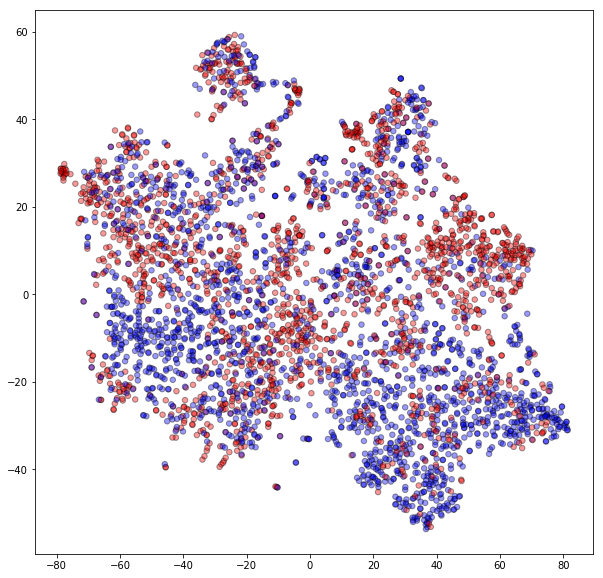

In [253]:
plt.figure(figsize=(10,10))

colors = np.array(["blue", "red"])
plt.scatter(x, y, alpha=0.4, c=colors[all_df["Party_Classification"]], marker='o', s=30, cmap='tab10', edgecolor="black");
plt.legend()

In [95]:
min_count = len(bank_min_df) + len(fr_min_df) + len(comm_min_df)
maj_count = len(bank_maj_df) + len(fr_maj_df) + len(comm_maj_df)
min_count, maj_count

(2085, 1811)

In [164]:
fr_arr = [fr_maj_df, fr_min_df]

In [171]:
fr_df = pd.concat(fr_arr).reset_index().drop("index", axis=1)
fr_df["Topic_Score"] = fr_df.apply(lambda row: get_rel_score(row["Release"]), axis=1)

In [185]:
fr_releases = list(fr_df["Topic_Score"])

In [186]:
test_kmeans = KMeans(n_clusters=2)
test_kmeans.fit_predict(fr_releases)

ValueError: setting an array element with a sequence.

In [190]:
test_df = all_df[["Label", "Topic_Score"]]
pd.get_dummies(test_df, columns=["Label"])

,Topic_Score,"Label_Banking, Democratic","Label_Banking, Republican","Label_Commerce, Democratic","Label_Commerce, Republican","Label_Foreign Relations, Democratic","Label_Foreign Relations, Republican"
0,"[0.132771266865, 0.163750511893, 0.10224109906...",0,0,0,0,0,1
1,"[0.161836454371, 0.17799742471, 0.008777799282...",0,0,0,0,0,1
2,"[0.215197382818, 0.0895894397549, 0.0094056595...",0,0,0,0,0,1
3,"[0.282134728994, 0.222074805159, 0.02188816486...",0,0,0,0,0,1
4,"[0.107043760938, 0.0458559777496, 0.1090062981...",0,0,0,0,0,1
5,"[0.110378391454, 0.280921275607, 0.01450097725...",0,0,0,0,0,1
6,"[0.0463834431355, 0.146295225502, 0.1925549346...",0,0,0,0,0,1
7,"[0.150809249264, 0.0853150247797, 0.0009371635...",0,0,0,0,0,1
8,"[0.209973498372, 0.303223559131, 0.00320713788...",0,0,0,0,0,1
9,"[0.129568783877, 0.326918783009, 0.0, 0.0, 0.0...",0,0,0,0,0,1


In [191]:
def get_party_classification(party):
    if party == "Democratic":
        return 0
    else:
        return 1

In [193]:
all_df["Party_Classification"] = all_df.apply(lambda row: get_party_classification(row["Party"]), axis=1)

In [195]:
model = KMeans(n_clusters=2)

In [237]:
scores = pd.DataFrame(list(all_df.Topic_Score))
scores = scores.fillna(0)

In [209]:
model.fit(scores)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [243]:
type(results1)

numpy.ndarray

In [215]:
results1 = tsne_model.fit_transform(scores)

In [216]:
model.fit(results1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [217]:
model.labels_

array([1, 1, 0, ..., 0, 0, 0], dtype=int32)

In [218]:
Counter(model.labels_)

Counter({0: 1934, 1: 1962})

In [219]:
x1, y1 = get_coords(results1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


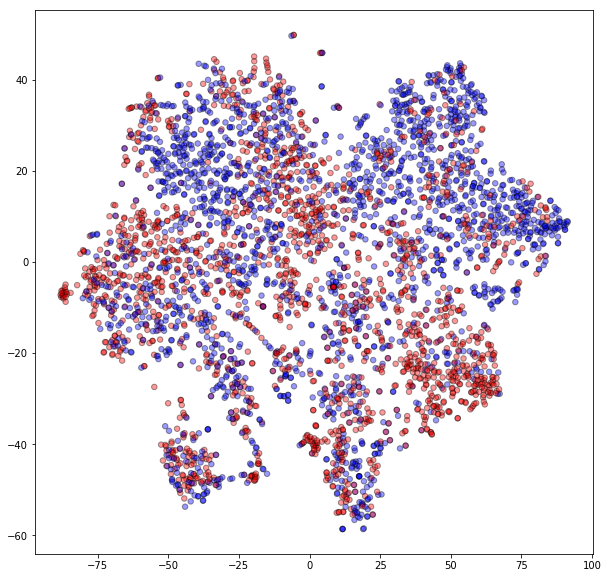

In [252]:
plt.figure(figsize=(10,10))
colors = np.array(["blue", "red"])
plt.scatter(x1, y1, alpha=0.4, c=colors[all_df["Party_Classification"]], marker='o', s=30, cmap='tab10', edgecolor="black");
plt.legend()

In [224]:
kmeans.labels_

array([0, 0, 4, ..., 4, 4, 1], dtype=int32)

In [230]:
all_df.Party.value_counts()

Democratic    2085
Republican    1811
Name: Party, dtype: int64

### Foreign Relations Clustering

###### 30 Topics

In [233]:
fr_df["Party_Classification"] = fr_df.apply(lambda row: get_party_classification(row["Party"]), axis=1)

In [234]:
fr_model = KMeans(n_clusters=2)


In [240]:
fr_scores = pd.DataFrame(list(all_df.Topic_Score))
fr_scores = fr_scores.fillna(0)
#fr_scores

In [245]:
fr_model.fit(fr_scores)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [343]:
fr_tsne = tsne_model.fit_transform(fr_scores)

ValueError: X should be a square distance matrix

In [242]:
fr_x, fr_y = get_coords(fr_tsne)

pandas.core.frame.DataFrame

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


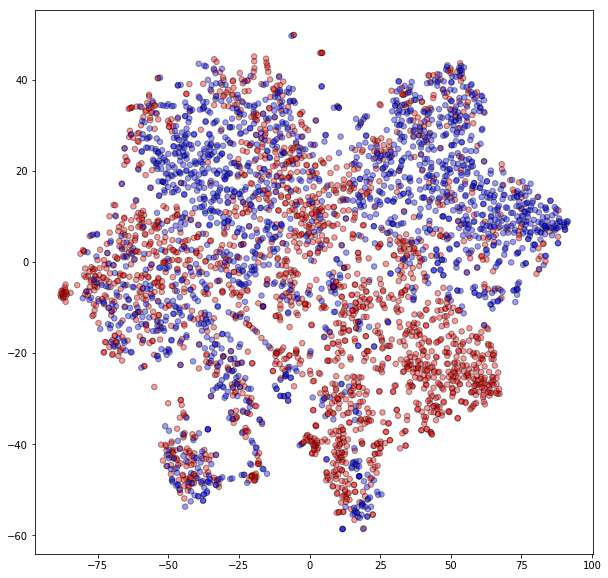

In [251]:
plt.figure(figsize=(10,10))
colors = np.array(["blue", "red"])
plt.scatter(fr_x, fr_y, alpha=0.4, c=colors[fr_df["Party_Classification"]], marker='o', s=30, cmap='tab10', edgecolor="black");
plt.legend()

In [248]:
len(fr_min_df)

910

In [249]:
Counter(fr_model.labels_)

Counter({0: 1087, 1: 2809})

In [250]:
len(fr_df)

1970

In [264]:
polarity = []
for release in list(fr_df.Release):
    x = TextBlob(release)
    polarity.append(x.polarity)

In [268]:
np.argmin(polarity)

239

In [269]:
polarity[239]

-0.5125000000000001

In [274]:
sorted(polarity)
arr = list(fr_df.Release)

[' United States Senate Committee on Foreign Relations Hearing: Corruption: Violent Extremism, Kleptocracy, and the Dangers of Failing Governance ']

##### 150 Topics

In [429]:
fr_df = all_df[all_df.Committee == "Foreign Relations"]
fr_scores = pd.DataFrame(list(fr_df.Topic_Score))

AttributeError: 'DataFrame' object has no attribute 'Topic_Score'

In [324]:
fr_scores

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.420341,0.356229,0.000000,0.053970,0.003016,0.012252,0.000251,0.053650,0.000000,0.012183,...,0.000152,0.000048,0.000000,0.000230,0.001985,0.000218,0.022253,0.024750,0.045801,0.004189
1,0.281104,0.415753,0.000912,0.001465,0.095865,0.000872,0.001099,0.074371,0.000118,0.000522,...,0.000545,0.008343,0.000603,0.008377,0.000005,0.000086,0.000592,0.005504,0.050308,0.001390
2,0.075437,0.155173,0.278014,0.003526,0.084896,0.030918,0.093616,0.046241,0.000000,0.023961,...,0.010372,0.007124,0.000598,0.003084,0.000000,0.006373,0.000060,0.003108,0.000924,0.007138
3,0.733320,0.448527,0.002227,0.000000,0.000000,0.000000,0.000000,0.000136,0.000000,0.000000,...,0.000331,0.000305,0.000000,0.038119,0.000000,0.000000,0.000052,0.000000,0.000000,0.000000
4,0.071966,0.102685,0.000540,0.001550,0.000000,0.000000,0.005186,0.286533,0.000644,0.004000,...,0.000256,0.000061,0.000757,0.006634,0.000144,0.002756,0.000533,0.039568,0.001402,0.000455
5,0.451716,0.646670,0.003446,0.000000,0.000000,0.000000,0.001529,0.000586,0.000000,0.000000,...,0.005047,0.042345,0.000000,0.062407,0.000000,0.018781,0.001073,0.000000,0.001804,0.000000
6,0.169395,0.404095,0.002296,0.053431,0.002815,0.010088,0.005253,0.060732,0.000000,0.007037,...,0.000766,0.000000,0.000000,0.001051,0.001472,0.000229,0.020566,0.080774,0.044299,0.003734
7,0.096139,0.276847,0.000812,0.000000,0.000000,0.087516,0.266866,0.000174,0.000170,0.000377,...,0.000013,0.014533,0.074128,0.003169,0.001150,0.002261,0.000087,0.000352,0.000133,0.001007
8,0.479512,0.696510,0.705685,0.000000,0.000000,0.309047,0.002594,0.000053,0.000098,0.000432,...,0.000000,0.000000,0.000000,0.065267,0.000000,0.012260,0.000349,0.000792,0.000564,0.000876
9,0.518482,0.758710,0.000000,0.000000,0.000000,0.000000,0.006680,0.000464,0.000000,0.000000,...,0.001857,0.000000,0.001010,0.064870,0.000000,0.010167,0.001010,0.000000,0.000000,0.000000


In [328]:
fr_scores =fr_scores.fillna(0)

In [349]:
fr_tsne = tsne_model.fit_transform(fr_scores)

In [350]:
fr_x, fr_y = get_coords(fr_tsne)

plt.figure(figsize=(10,10))
colors = np.array(["blue", "red"])
plt.scatter(fr_x, fr_y, alpha=0.4, c=colors[fr_df["Party_Classification"]], marker='o', s=30, cmap='tab10', edgecolor="black");
plt.legend()

###### With 9 committees & 150 topics in the model

In [12]:
fr_df = all_df[all_df.Committee=="Foreign Relations"]
temp_df = pd.concat([fr_df, fr_df.apply(lambda row: pd.Series(get_rel_score(row["Release"])), axis=1)], axis=1)
scores_df = temp_df.iloc[:, 10:]
scores_df

,1,2,3,4,5,6,7,8,9,10,...,190,191,192,193,194,195,196,197,198,199
6060,0.000117,4.932543e-01,5.005680e-07,0.000000,1.802811e-01,0.000000,0.001059,0.111105,0.000000,7.976820e-05,...,0.000000,2.370790e-02,0.000000,2.551860e-05,0.000000,0.000003,4.206904e-06,0.000071,0.032768,0.000000e+00
6061,0.384550,6.136812e-01,1.152570e-04,0.000000,0.000000e+00,0.000000,0.001645,0.000000,0.000000,0.000000e+00,...,0.000000,6.655678e-06,0.000015,2.142811e-02,0.000000,0.000951,6.901642e-02,0.000000,0.102486,0.000000e+00
6062,0.000000,8.766874e-01,3.522499e-04,0.000000,0.000000e+00,0.000000,0.000434,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000031,0.000000e+00,0.000000,0.000165,0.000000e+00,0.000000,0.134935,0.000000e+00
6063,0.000000,4.091208e-01,3.560983e-03,0.002857,2.468310e-04,0.000000,0.001833,0.000493,0.000064,0.000000e+00,...,0.000134,0.000000e+00,0.000018,0.000000e+00,0.000000,0.024292,0.000000e+00,0.000000,0.017065,9.568836e-04
6064,0.000103,2.066334e-01,4.749409e-07,0.000000,9.214192e-07,0.000071,0.000000,0.000053,0.000000,4.704090e-05,...,0.000000,7.161496e-06,0.000000,0.000000e+00,0.029042,0.000000,8.124886e-03,0.000067,0.000000,1.421649e-02
6065,0.000813,2.557005e-01,0.000000e+00,0.177408,4.502702e-06,0.001738,0.000645,0.000127,0.045844,6.769566e-05,...,0.000000,0.000000e+00,0.012823,0.000000e+00,0.000122,0.020962,2.873364e-02,0.000697,0.017590,1.117424e-02
6066,0.570653,7.845352e-01,0.000000e+00,0.020695,0.000000e+00,0.086045,0.055064,0.000978,0.000070,0.000000e+00,...,0.000000,4.096698e-02,0.000007,3.096532e-05,0.000018,0.000074,7.325179e-02,0.000127,0.014277,0.000000e+00
6067,0.000000,1.132108e+00,4.307827e-04,0.000000,0.000000e+00,0.000000,0.001770,0.002719,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000021,3.295886e-02,0.000046,0.001494,0.000000e+00,0.000533,0.000326,0.000000e+00
6068,0.000553,5.694704e-01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.050695,0.000270,0.000000,1.058910e-05,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000013,0.000000,3.403402e-06,0.000000,0.014691,0.000000e+00
6069,0.000080,2.621593e-01,0.000000e+00,0.000000,0.000000e+00,0.002892,0.000000,0.000186,0.000000,1.036562e-04,...,0.000000,1.148736e-05,0.000000,7.512788e-05,0.000188,0.007718,1.310628e-02,0.001197,0.026833,0.000000e+00


In [431]:
fr_tsne = tsne_model.fit_transform(scores_df)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


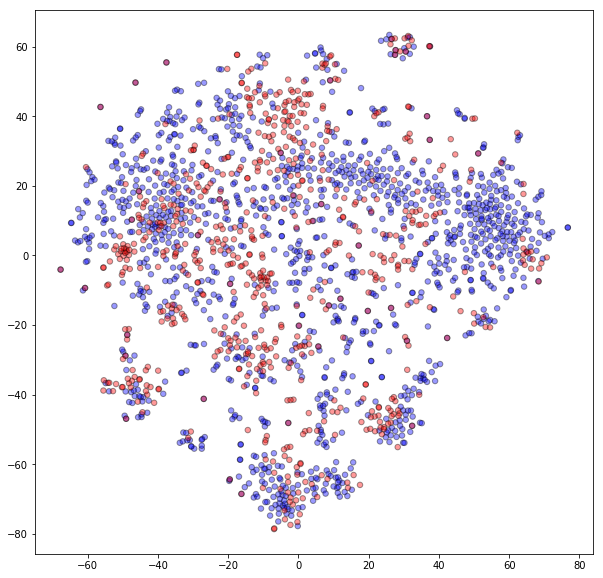

In [432]:
fr_df["Party_Classification"] = fr_df.apply(lambda row: get_party_classification(row["Party"]), axis=1)
fr_x, fr_y = get_coords(fr_tsne)
plt.figure(figsize=(10,10))
colors = np.array(["blue", "red"])
plt.scatter(fr_x, fr_y, alpha=0.4, c=colors[fr_df["Party_Classification"]], marker='o', s=30, cmap='tab10', edgecolor="black");
plt.legend()

In [501]:
fr_df["x"] = fr_x
fr_df["y"] = fr_y

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [508]:
dem_fr_df = fr_df[fr_df.Party == "Democratic"]
rep_fr_df = fr_df[fr_df.Party == "Republican"]

dem_trace = go.Scatter(
    x = dem_fr_df["x"],
    y = dem_fr_df["y"],
    mode = 'markers',
    text = dem_fr_df["Title"],
    marker = dict(
        color="blue"
    )
    
)

rep_trace = go.Scatter(
    x = rep_fr_df["x"],
    y = rep_fr_df["y"],
    mode = 'markers',
    text = rep_fr_df["Title"],
    marker = dict(
        color="red"
    )
    
)

# # Plot and embed in ipython notebook!

fig = go.Figure(data = [dem_trace, rep_trace])
py.plotly.iplot(fig, filename="hover-chart-basic")

In [13]:
dem_fr_df = fr_df[fr_df.Party == "Democratic"]
rep_fr_df = fr_df[fr_df.Party == "Republican"]

In [16]:
dem_releases = list(dem_fr_df["Release"])
rep_releases = list(rep_fr_df["Release"])

In [21]:
dem_scores = list()
for release in dem_releases:
    sents = nltk.sent_tokenize(release)
    rel_tf = tfidf.transform(sents)
    rel_nmf = nmf.transform(rel_tf)
    dem_scores.append(rel_nmf)


In [27]:
dem_avg = dem_scores[0].mean(axis=0)

In [28]:
rep_scores = list()
for release in rep_releases:
    sents = nltk.sent_tokenize(release)
    rel_tf = tfidf.transform(sents)
    rel_nmf = nmf.transform(rel_tf)
    rep_scores.append(rel_nmf)
rep_avg = rep_scores[0].mean(axis=0)

In [32]:
pairwise_distances(dem_avg.reshape(1,-1), rep_avg.reshape(1,-1), metric="cosine")

array([[ 0.4981357]])

#### Commerce Modeling

In [33]:
comm_df = all_df[all_df.Committee == "Commerce"]

In [434]:
temp_df = pd.concat([comm_df, comm_df.apply(lambda row: pd.Series(get_rel_score(row["Release"])), axis=1)], axis=1)
comm_scores_df = temp_df.iloc[:, 10:]
comm_scores_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
3164,0.611680,0.000000,0.000000,8.021144e-03,0.004025,6.048976e-04,0.000000,0.002906,0.000762,0.156992,...,5.374870e-04,0.071680,0.000355,0.000000e+00,0.000000,0.000000e+00,5.746534e-05,0.000000,0.000000,0.001622
3165,0.799122,0.365949,0.000000,0.000000e+00,0.007988,2.692963e-07,0.000000,0.000000,0.000000,0.103236,...,5.769857e-05,0.092168,0.000000,1.130202e-02,0.000000,1.662723e-02,2.251733e-02,0.095735,0.000004,0.000159
3166,2.294503,1.199032,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.321197,...,0.000000e+00,0.000000,0.000000,6.131311e-02,0.108925,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
3167,0.106236,0.000000,0.000000,0.000000e+00,0.000000,3.856261e-01,0.002737,0.000000,0.000000,0.027463,...,5.529975e-02,0.000000,0.000000,0.000000e+00,0.000186,4.663633e-07,0.000000e+00,0.000774,0.000000,0.000000
3168,1.268655,0.000000,0.000000,0.000000e+00,0.000000,1.188244e-03,0.003132,0.000000,0.003101,0.757033,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000060,0.000000e+00,3.666996e-04,0.000443,0.000081,0.000000
3169,0.970731,0.000955,0.000000,1.463849e-04,0.000000,0.000000e+00,0.123676,0.000176,0.136348,0.117956,...,3.115172e-05,0.025438,0.000000,3.250176e-08,0.034698,0.000000e+00,0.000000e+00,0.000974,0.101901,0.000077
3170,0.732766,0.000000,0.063962,2.952741e-01,0.000000,1.154632e-01,0.000000,0.180087,0.000902,0.071668,...,2.633214e-02,0.000000,0.018457,0.000000e+00,0.000016,0.000000e+00,0.000000e+00,0.000205,0.012553,0.000000
3171,0.279078,0.000000,0.000000,3.077858e-05,0.000004,8.600155e-01,0.000000,0.002944,0.000000,0.071997,...,9.277900e-08,0.000000,0.000000,0.000000e+00,0.060738,0.000000e+00,2.312131e-02,0.000000,0.000000,0.000000
3172,0.639209,0.000024,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.002927,0.000891,0.526866,...,0.000000e+00,0.000000,0.000018,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
3173,1.613647,0.001402,0.000003,0.000000e+00,0.011609,4.365608e-07,0.006137,0.000000,0.001682,0.200436,...,0.000000e+00,0.016812,0.008062,3.114734e-02,0.000535,1.251224e-03,1.445913e-07,0.002267,0.030909,0.000030


In [280]:
comm_model = KMeans(n_clusters=6)

In [435]:
comm_results = tsne_model.fit_transform(comm_scores_df)

In [436]:
comm_x, comm_y = get_coords(comm_results)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


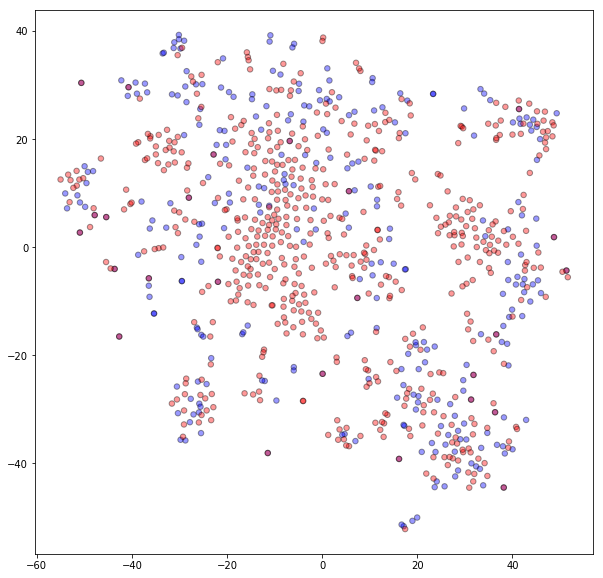

In [438]:
comm_df["Party_Classification"] = comm_df.apply(lambda row: get_party_classification(row["Party"]), axis=1)
plt.figure(figsize=(10,10))
colors = np.array(["blue", "red"])
plt.scatter(comm_x, comm_y, alpha=0.4, c=colors[comm_df["Party_Classification"]], marker='o', s=30, cmap='tab10', edgecolor="black");
plt.legend()

In [497]:
comm_df["x"] = comm_x
comm_df["y"] = comm_y

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [499]:
dem_comm_df = comm_df[comm_df.Party == "Democratic"]
rep_comm_df = comm_df[comm_df.Party == "Republican"]

dem_trace = go.Scatter(
    x = dem_comm_df["x"],
    y = dem_comm_df["y"],
    mode = 'markers',
    text = [dem_bank_df["Title"], dem_bank_df["Date"]],
    marker = dict(
        color="blue"
    )
    
)

rep_trace = go.Scatter(
    x = rep_comm_df["x"],
    y = rep_comm_df["y"],
    mode = 'markers',
    text = dem_bank_df["Title"],
    marker = dict(
        color="red"
    )
    
)

# # Plot and embed in ipython notebook!

fig = go.Figure(data = [dem_trace, rep_trace])
py.plotly.iplot(fig, filename="hover-chart-basic")

In [34]:
dem_comm_df = comm_df[comm_df.Party == "Democratic"]
dem_releases = list(dem_comm_df["Release"])

rep_comm_df = comm_df[comm_df.Party == "Republican"]
rep_releases = list(rep_comm_df["Release"])

In [36]:
rep_scores = list()
for release in rep_releases:
    sents = nltk.sent_tokenize(release)
    rel_tf = tfidf.transform(sents)
    rel_nmf = nmf.transform(rel_tf)
    rep_scores.append(rel_nmf)

In [37]:
dem_scores = list()
for release in dem_releases:
    sents = nltk.sent_tokenize(release)
    rel_tf = tfidf.transform(sents)
    rel_nmf = nmf.transform(rel_tf)
    dem_scores.append(rel_nmf)

In [39]:
rep_avg = rep_scores[0].mean(axis=0)
dem_avg = dem_scores[0].mean(axis=0)

In [41]:
pairwise_distances(rep_avg.reshape(1,-1), dem_avg.reshape(1,-1), metric="cosine")

array([[ 0.31335383]])

#### Banking Modeling

In [476]:
bank_df = all_df[all_df.Committee == "Banking"]
len(bank_df)

1041

In [477]:
temp_df = pd.concat([bank_df, bank_df.apply(lambda row: pd.Series(get_rel_score(row["Release"])), axis=1)], axis=1)
bank_scores_df = temp_df.iloc[:, 10:]
bank_scores_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
1384,0.415756,0.000000e+00,0.000758,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000088,0.000000,0.001904,...,0.000000,0.000179,0.000000,0.000000,0.000000,0.043155,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
1385,0.413010,1.312583e-05,0.000638,7.143453e-05,0.336967,0.000000e+00,0.000000,0.000138,0.000744,0.001155,...,0.000000,0.000089,0.000009,0.030219,0.000016,0.019751,4.037266e-06,0.000172,1.014436e-04,2.244327e-02
1386,0.173953,0.000000e+00,0.086679,7.134101e-05,0.000000,0.000000e+00,0.387757,0.000105,0.000000,0.171683,...,0.000000,0.000083,0.000019,0.000000,0.015980,0.000063,2.304944e-02,0.000000,0.000000e+00,0.000000e+00
1387,0.282473,0.000000e+00,0.000993,5.099658e-03,0.002931,3.860246e-04,0.127683,0.000210,0.098509,0.001469,...,0.037323,0.000137,0.000030,0.000000,0.008941,0.000101,2.737366e-05,0.000099,7.735529e-05,9.558651e-04
1388,0.190005,3.576367e-01,0.000667,1.031626e-02,0.184491,2.308568e-01,0.069709,0.000513,0.000285,0.167691,...,0.000691,0.000092,0.000020,0.000000,0.020111,0.000147,1.746189e-04,0.000109,0.000000e+00,1.941519e-03
1389,0.149486,2.565228e-05,0.000525,1.101179e-03,0.000340,6.722523e-05,0.000000,0.003087,0.000903,0.167452,...,0.036759,0.000061,0.000030,0.000000,0.014897,0.010839,4.639422e-06,0.000000,0.000000e+00,2.114625e-04
1390,0.186606,7.763841e-04,0.000655,7.071943e-05,0.000000,0.000000e+00,0.000000,0.001366,0.000172,0.000974,...,0.000025,0.000109,0.000019,0.000029,0.010127,0.024414,0.000000e+00,0.000000,2.364952e-06,5.124512e-05
1391,0.237506,4.004122e-01,0.000834,9.056816e-05,0.000000,0.000000e+00,0.000000,0.000179,0.112526,0.109456,...,0.000000,0.000115,0.000025,0.000000,0.034444,0.034446,0.000000e+00,0.000176,1.068535e-04,4.732477e-07
1392,0.282443,2.499042e-07,0.279652,2.067777e-03,0.000000,3.055649e-01,0.118991,0.000037,0.032019,0.001944,...,0.000286,0.026797,0.000018,0.000000,0.000047,0.000032,1.723243e-04,0.000231,1.601507e-02,0.000000e+00
1393,0.410206,0.000000e+00,0.342444,1.090235e-02,0.245309,8.663439e-04,0.208774,0.000821,0.062562,0.002413,...,0.000939,0.000180,0.000022,0.009673,0.040429,0.000510,3.105732e-04,0.014346,3.595861e-02,1.390889e-03


In [478]:
len(bank_scores_df)

1041

In [441]:
bank_df["Party_Classification"] = bank_df.apply(lambda row: get_party_classification(row["Party"]), axis=1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [479]:
bank_results = tsne_model.fit_transform(bank_scores_df)

In [481]:
bank_x, bank_y = get_coords(bank_results)

In [484]:
bank_df["x"] = bank_x
bank_df["y"] = bank_y

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [485]:
bank_df

,index,Committee,Date,Day,Label,Month,Party,Release,Title,Year,x,y
1384,1399,Banking,2017-11-13,13.0,"Democratic, Banking",11.0,Democratic,BROWN OPPOSES LEGISLATION TO ROLL BACK DODD-FR...,Brown Opposes Legislation to Roll Back Dodd-Fr...,2017.0,-42.197269,-10.342386
1385,1400,Banking,2017-11-01,1.0,"Democratic, Banking",11.0,Democratic,"WASHINGTON, D.C. U.S. Sen. Sherrod Brown (D...",Brown Opening Statement at Banking Committee H...,2017.0,-4.314775,11.874923
1386,1401,Banking,2017-10-24,24.0,"Democratic, Banking",10.0,Democratic,"WASHINGTON, D.C. U.S. Sen. Sherrod Brown (D-O...",Brown Opening Statement at Banking Committee H...,2017.0,32.404057,48.730862
1387,1402,Banking,2017-10-17,17.0,"Democratic, Banking",10.0,Democratic,"WASHINGTON, D.C. U.S. Sen. Sherrod Brown (D-O...",Brown Opening Statement at Banking Committee H...,2017.0,8.258377,-14.967568
1388,1403,Banking,2017-10-04,4.0,"Democratic, Banking",10.0,Democratic,"WASHINGTON, D.C. U.S. Sen. Sherrod Brown (D-O...",Brown Opening Statement at Banking Committee H...,2017.0,53.570183,-17.081631
1389,1404,Banking,2017-10-03,3.0,"Democratic, Banking",10.0,Democratic,"WASHINGTON, D.C. U.S. Sen. Sherrod Brown (D-O...",Brown Opening Statement at Banking Committee H...,2017.0,-17.458958,16.226603
1390,1405,Banking,2017-09-28,28.0,"Democratic, Banking",9.0,Democratic,"WASHINGTON, D.C. U.S. Sen. Sherrod Brown (D-O...",Brown Opening Statement at Banking Committee H...,2017.0,-29.978607,20.772470
1391,1406,Banking,2017-09-26,26.0,"Democratic, Banking",9.0,Democratic,"WASHINGTON, D.C. U.S. Sen. Sherrod Brown (D-O...",Brown Opening Statement at Banking Committee H...,2017.0,53.960205,-15.461077
1392,1407,Banking,2017-09-14,14.0,"Democratic, Banking",9.0,Democratic,BROWN OPENING STATEMENT AT BANKING COMMITTEE H...,Brown Opening Statement at Banking Committee H...,2017.0,26.458857,12.513220
1393,1408,Banking,2017-09-12,12.0,"Democratic, Banking",9.0,Democratic,"WASHINGTON, D.C. U.S. Sen. Sherrod Brown (D-O...",Brown Opening Statement at Banking Committee H...,2017.0,9.215899,-18.507641


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


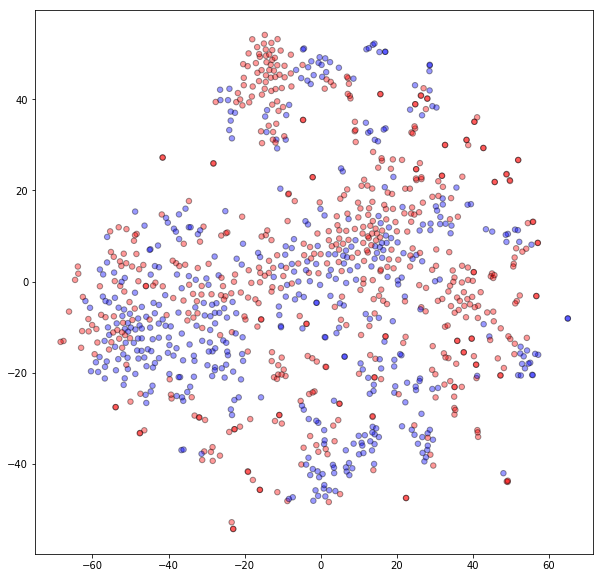

In [442]:

plt.figure(figsize=(10,10))
colors = np.array(["blue", "red"])
plt.scatter(bank_x, bank_y, alpha=0.4, c=colors[comm_df["Party_Classification"]], marker='o', s=30, cmap='tab10', edgecolor="black");
plt.legend()

In [491]:
len(dem_bank_df)

876

In [493]:
dem_bank_df = bank_df[bank_df.Party == "Democratic"]
rep_bank_df = bank_df[bank_df.Party == "Republican"]

dem_trace = go.Scatter(
    x = dem_bank_df["x"],
    y = dem_bank_df["y"],
    mode = 'markers',
    text = dem_bank_df["Title"],
    marker = dict(
        color="blue"
    )
    
)

rep_trace = go.Scatter(
    x = rep_bank_df["x"],
    y = rep_bank_df["y"],
    mode = 'markers',
    marker = dict(
        color="red"
    )
    
)

# # Plot and embed in ipython notebook!

fig = go.Figure(data = [dem_trace, rep_trace])
py.plotly.iplot(fig, filename="hover-chart-basic")

## Word2Vec

In [560]:
test_rel = list(all_df["Release"])
en_stop = stopwords.words('english') + ['.', ',', '(', ')', "'", '"', "-", "!", "!!", "!!!", "...", "|"]


# list for tokenized documents in loop
test_words = []

# loop through document list
for line in test_rel:
    # clean and tokenize document string
    raw = line.lower()
    tokens = nltk.wordpunct_tokenize(raw)
    
    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    
    #add to list
    test_words.append(stopped_tokens)



In [45]:
test_mod = Word2Vec(test_words,size=100, window=5, min_count=1, workers=2,sg=1)

In [166]:
test_mod.most_similar("crisis")

[('crises', 0.8232291340827942),
 ('catastrophe', 0.7477894425392151),
 ('unfolding', 0.7422991394996643),
 ('calamity', 0.7369948625564575),
 ('precipitated', 0.7235472798347473),
 ('woes', 0.7182559967041016),
 ('downturn', 0.7172675728797913),
 ('meltdown', 0.7162792086601257),
 ('gripping', 0.7021225690841675),
 ('looming', 0.6995431184768677)]

In [173]:
test_mod.most_similar("bipartisan", topn=50)



[('bicameral', 0.8676645755767822),
 ('garnered', 0.7572324275970459),
 ('culmination', 0.752194881439209),
 ('standalone', 0.7462770938873291),
 ('mtbs', 0.7412068247795105),
 ('abipartisan', 0.7405203580856323),
 ('cameral', 0.7374404668807983),
 ('highereducation', 0.7319022417068481),
 ('brokered', 0.7257267236709595),
 ('shepherd', 0.7228734493255615),
 ('bi', 0.7192924618721008),
 ('garners', 0.7190889716148376),
 ('reauthorizations', 0.7180516123771667),
 ('764', 0.7135618329048157),
 ('resembles', 0.7135502099990845),
 ('1177', 0.7122527360916138),
 ('complements', 0.7111150026321411),
 ('ecaa', 0.7105922698974609),
 ('reintroducing', 0.7098325490951538),
 ('consensus', 0.7092032432556152),
 ('supercommittee', 0.708802342414856),
 ('yearlong', 0.7086502313613892),
 ('paves', 0.7084395885467529),
 ('57cosponsors', 0.7079797983169556),
 ('noncontroversial', 0.7079335451126099),
 ('mtb', 0.7020732164382935),
 ('culminates', 0.7018966674804688),
 ('thislegislation', 0.6992083787918

make sure parts of speech are balanced, lists should be roughly the same size, make sure they're on opposite poles

In [188]:
urgent_set = ["urgent", "pressing", "confront", "crisis", "confrontation"]
crisis_set = ["crisis", "catastrophe"]
bipartisan_set = ["bipartisan", "bicameral", "together"]
target = "This was a tough process"
target_arr = target.split(" ")
count = 0
for target in target_arr:
    try:
        count += mean([test_mod.similarity (target, w) for w in bipartisan_set])
    except:
        pass
#scale = mean([test_mod.similarity(target, w) for w in free_set]) - mean([test_mod.similarity(target, w) for w in neg_set])
#scale
count/len(target_arr)

0.14401401611002243

In [179]:
test_mod.similarity("bipartisan", "cooperation")

0.44706356758656085

In [591]:
vocab = list(test_mod.wv.vocab)
vocab_arr =  test_mod[vocab]

array([[ -2.65713006e-01,   6.84580982e-01,   2.75582373e-01, ...,
          5.73967956e-03,  -5.27034700e-02,  -1.16168253e-01],
       [ -6.19302869e-01,   2.63905734e-01,   6.04787827e-01, ...,
         -3.92478675e-01,  -4.79133636e-01,  -7.05451816e-02],
       [ -3.80999953e-01,   7.44631946e-01,  -3.25837255e-01, ...,
         -2.88167298e-01,  -4.21543777e-01,  -3.71887714e-01],
       ..., 
       [  6.17577545e-02,   1.15388133e-01,  -2.57435646e-02, ...,
         -3.21473368e-02,   1.20006604e-02,  -3.08664273e-02],
       [  2.54999008e-02,   1.86314583e-01,  -1.27123371e-01, ...,
         -4.23865132e-02,   2.75343936e-02,  -5.17499261e-02],
       [  6.02817051e-02,   6.27303198e-02,  -9.02826339e-03, ...,
         -1.74553352e-04,   4.85396683e-02,   1.76101414e-04]], dtype=float32)

In [611]:
x = list(test_mod.wv.vocab.items())[0:5][0]

In [50]:
sorted_arr = sorted(list(test_mod.wv.vocab.items()), key=lambda x: x[1].count)

In [51]:
top_five_thousand_words = sorted_arr[-5000:]

In [653]:
"iran" in list(map(lambda row: row[0], top_five_thousand_words))

True

In [77]:
vocab = [i[0] for i in top_five_thousand_words]
X = test_mod[vocab]
w_tsne = TSNE(n_components=2)
X_tsne = w_tsne.fit_transform(X)

In [98]:
freedom_sim = [(word, test_mod.similarity("freedom", word)) for word in vocab]

In [99]:
sorted(freedom_sim, key=lambda x: x[1])

[('=', -0.043767996591149619),
 ('inflators', -0.033904643982520175),
 ('backlog', -0.019148202473714009),
 ('physician', -0.011886938487018869),
 ('infections', -0.011299123765398475),
 ('facility', -0.0015431106467067995),
 ('va', 0.010269319273454815),
 ('schedule', 0.016205837614496683),
 ('processing', 0.024191391177551987),
 ('inc', 0.02480230461887992),
 ('performed', 0.025670134876778824),
 ('freddie', 0.030096395788358786),
 ('highly', 0.030303938737447775),
 ('www', 0.032446173116747121),
 ('construction', 0.035201174610325653),
 ('@', 0.035510421119026414),
 ('://', 0.035570635416695619),
 ('ebola', 0.036292232803294494),
 ('de', 0.036930440440762234),
 ('biological', 0.03811377919284363),
 ('html', 0.0384932328693392),
 ('laboratory', 0.040515764973819202),
 ('discretionary', 0.040790263160235089),
 ('0', 0.041453742323887495),
 ('dod', 0.043050131687890798),
 ('returning', 0.04576560276472811),
 ('gov', 0.049099320377312149),
 ('contaminated', 0.04914649460538914),
 ('nih'

In [78]:
df = pd.concat([pd.DataFrame(X_tsne),
                pd.Series(vocab)],
               axis=1)


df.columns = ['x', 'y', 'word']



In [87]:
w2v_trace = go.Scatter(
    x = df["x"],
    y = df["y"],
    mode = 'markers',
    text = df["word"],
    marker = dict(
        color="blue"
    )
    
)




# # Plot and embed in ipython notebook!

fig = go.Figure(data=[w2v_trace])
py.plotly.iplot(fig, filename="text-chart-basic")

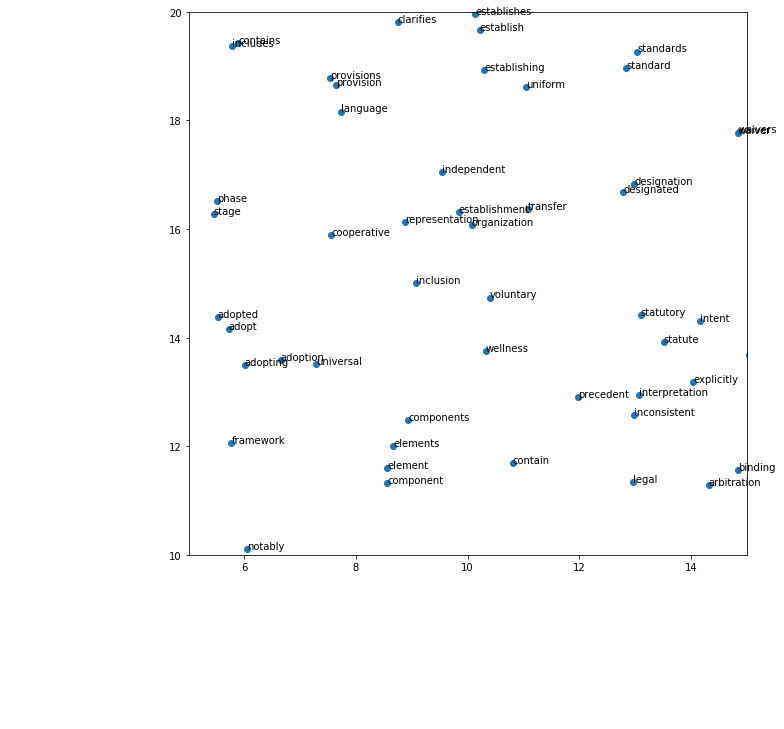

In [88]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])
for i, txt in enumerate(df['word']):
    ax.annotate(txt, (df['x'].iloc[i], df['y'].iloc[i]))

ax.set_xlim(left = 5, right = 15)
ax.set_ylim(top = 20, bottom = 10)
    
plt.show()